# ZEvent 2025 - Analyse des Données

Analyse complète des données ZEvent 2025 : statistiques, tendances et insights.

## Objectifs
- 📊 **Statistiques descriptives** : Vue d'ensemble des métriques
- 🏆 **Analyse des streamers** : Top performers, distribution
- 💰 **Analyse des dons** : Patterns, objectifs, évolution
- 📈 **Tendances temporelles** : Évolution sur la durée de l'événement
- 🔍 **Insights** : Découvertes et corrélations intéressantes

## 1. Setup et Chargement des Données

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Configuration
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

# Chemins
project_root = Path.cwd().parent  # Remonter depuis notebooks/
data_dir = project_root / 'data' / 'clean'
outputs_dir = project_root / 'outputs'
outputs_dir.mkdir(exist_ok=True)

print(f"📂 Données : {data_dir}")
print(f"📈 Outputs : {outputs_dir}")

📂 Données : c:\Users\Linwë\Documents\ZEvent2025_data_analyse\data\clean
📈 Outputs : c:\Users\Linwë\Documents\ZEvent2025_data_analyse\outputs


In [7]:
# Chargement des datasets
try:
    # Données streamers
    df_streamers = pd.read_csv(data_dir / 'streamers' / 'streamers_data.csv')
    print(f"✅ Streamers: {len(df_streamers)} lignes")
    
    # Données enrichies (si disponibles)
    enriched_file = data_dir / 'streamers' / 'zevent_sullygnome_enriched.csv'
    if enriched_file.exists():
        df_enriched = pd.read_csv(enriched_file)
        print(f"✅ Données enrichies: {len(df_enriched)} lignes")
    else:
        df_enriched = df_streamers.copy()
        print("⚠️ Pas de données enrichies, utilisation des données de base")
    
    # Événements et goals
    events_file = data_dir / 'events' / 'event_schedule.csv'
    goals_file = data_dir / 'events' / 'donation_goals.csv'
    
    df_events = pd.read_csv(events_file) if events_file.exists() else pd.DataFrame()
    df_goals = pd.read_csv(goals_file) if goals_file.exists() else pd.DataFrame()
    
    print(f"✅ Événements: {len(df_events)} lignes")
    print(f"✅ Goals: {len(df_goals)} lignes")
    
except Exception as e:
    print(f"❌ Erreur chargement: {e}")

✅ Streamers: 319 lignes
✅ Données enrichies: 316 lignes
✅ Événements: 57 lignes
✅ Goals: 5442 lignes


## 2. Vue d'Ensemble - Statistiques Générales

In [8]:
# Métriques générales ZEvent 2025
print("🎮 ZEVENT 2025 - VUE D'ENSEMBLE")
print("=" * 40)

# Calculs de base
total_streamers = len(df_streamers)

# Dons totaux (si colonne disponible)
donation_cols = [col for col in df_streamers.columns if 'donation' in col.lower() or 'don' in col.lower()]
if donation_cols:
    total_donations = df_streamers[donation_cols[0]].sum()
    print(f"💰 Total des dons: {total_donations:,.2f} €")
    print(f"👥 Nombre de streamers: {total_streamers}")
    print(f"💵 Don moyen par streamer: {total_donations/total_streamers:,.2f} €")
else:
    print(f"👥 Nombre de streamers: {total_streamers}")
    print("⚠️ Colonnes de dons non trouvées")

# Affichage des colonnes disponibles
print(f"\n📊 Colonnes disponibles: {len(df_streamers.columns)}")
for i, col in enumerate(df_streamers.columns):
    print(f"   {i+1:2d}. {col}")

🎮 ZEVENT 2025 - VUE D'ENSEMBLE
💰 Total des dons: 12,933,157.44 €
👥 Nombre de streamers: 319
💵 Don moyen par streamer: 40,542.81 €

📊 Colonnes disponibles: 5
    1. donation
    2. pools
    3. times
    4. viewers
    5. viewers_max


## 3. Analyse des Streamers

In [9]:
# Top streamers par dons (si disponible)
if donation_cols:
    donation_col = donation_cols[0]
    
    print("🏆 TOP 10 STREAMERS PAR DONS")
    print("=" * 30)
    
    top_streamers = df_streamers.nlargest(10, donation_col)
    
    username_col = 'username' if 'username' in df_streamers.columns else df_streamers.columns[0]
    
    for i, (_, streamer) in enumerate(top_streamers.iterrows(), 1):
        name = streamer[username_col]
        amount = streamer[donation_col]
        print(f"   {i:2d}. {name:<20} {amount:>10,.2f} €")
    
    # Statistiques descriptives
    print(f"\n📊 STATISTIQUES DES DONS")
    print(f"   Médiane: {df_streamers[donation_col].median():,.2f} €")
    print(f"   Écart-type: {df_streamers[donation_col].std():,.2f} €")
    print(f"   Min: {df_streamers[donation_col].min():,.2f} €")
    print(f"   Max: {df_streamers[donation_col].max():,.2f} €")

🏆 TOP 10 STREAMERS PAR DONS
    1. 1479669.67           1,479,669.67 €
    2. 1218838.44           1,218,838.44 €
    3. 1154211.58           1,154,211.58 €
    4. 568758.58            568,758.58 €
    5. 553537.29            553,537.29 €
    6. 420852.19            420,852.19 €
    7. 403097.43            403,097.43 €
    8. 402050.12            402,050.12 €
    9. 342077.26            342,077.26 €
   10. 306123.27            306,123.27 €

📊 STATISTIQUES DES DONS
   Médiane: 5,035.00 €
   Écart-type: 142,901.77 €
   Min: 38.00 €
   Max: 1,479,669.67 €


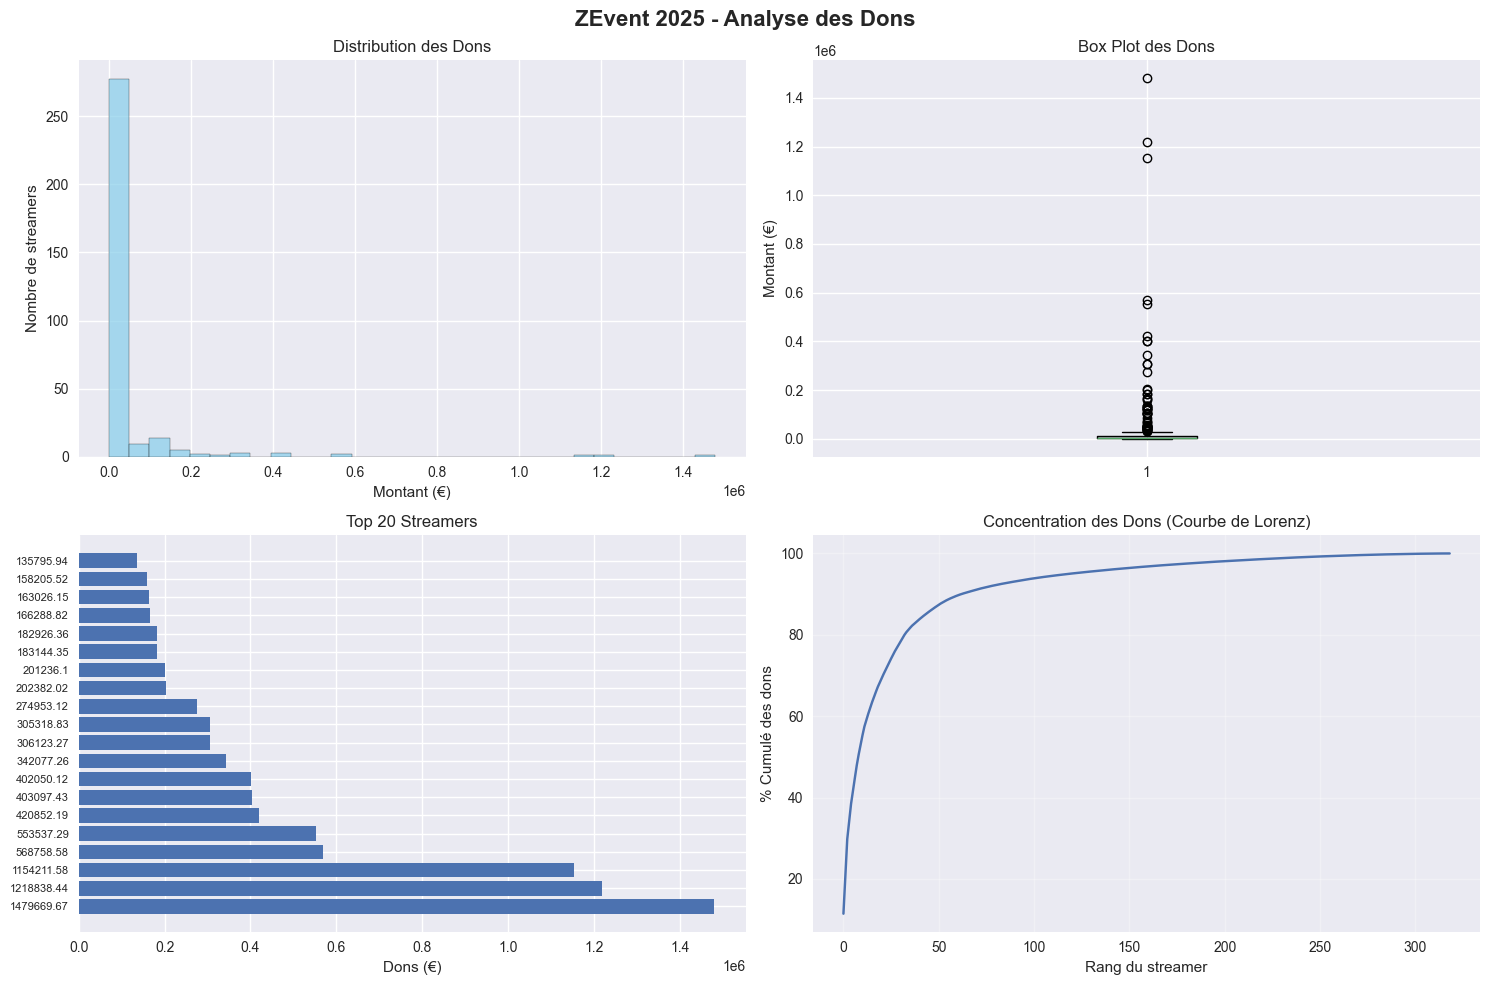


📈 PRINCIPE DE PARETO
   Les top 20% des streamers génèrent 90.2% des dons


In [10]:
# Distribution des dons
if donation_cols:
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('ZEvent 2025 - Analyse des Dons', fontsize=16, fontweight='bold')
    
    # Histogramme
    axes[0,0].hist(df_streamers[donation_col], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    axes[0,0].set_title('Distribution des Dons')
    axes[0,0].set_xlabel('Montant (€)')
    axes[0,0].set_ylabel('Nombre de streamers')
    
    # Box plot
    axes[0,1].boxplot(df_streamers[donation_col])
    axes[0,1].set_title('Box Plot des Dons')
    axes[0,1].set_ylabel('Montant (€)')
    
    # Top 20 streamers
    top20 = df_streamers.nlargest(20, donation_col)
    axes[1,0].barh(range(len(top20)), top20[donation_col])
    axes[1,0].set_title('Top 20 Streamers')
    axes[1,0].set_xlabel('Dons (€)')
    axes[1,0].set_yticks(range(len(top20)))
    if username_col in top20.columns:
        axes[1,0].set_yticklabels(top20[username_col], fontsize=8)
    
    # Cumul des dons
    sorted_donations = df_streamers[donation_col].sort_values(ascending=False)
    cumul_pct = (sorted_donations.cumsum() / sorted_donations.sum()) * 100
    axes[1,1].plot(range(len(cumul_pct)), cumul_pct)
    axes[1,1].set_title('Concentration des Dons (Courbe de Lorenz)')
    axes[1,1].set_xlabel('Rang du streamer')
    axes[1,1].set_ylabel('% Cumulé des dons')
    axes[1,1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(outputs_dir / 'analyse_dons.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Principe de Pareto
    top_20_pct_index = int(len(sorted_donations) * 0.2)
    pareto_contrib = cumul_pct.iloc[top_20_pct_index]
    print(f"\n📈 PRINCIPE DE PARETO")
    print(f"   Les top 20% des streamers génèrent {pareto_contrib:.1f}% des dons")

## 4. Analyse des Corrélations

🔍 ANALYSE DES CORRÉLATIONS


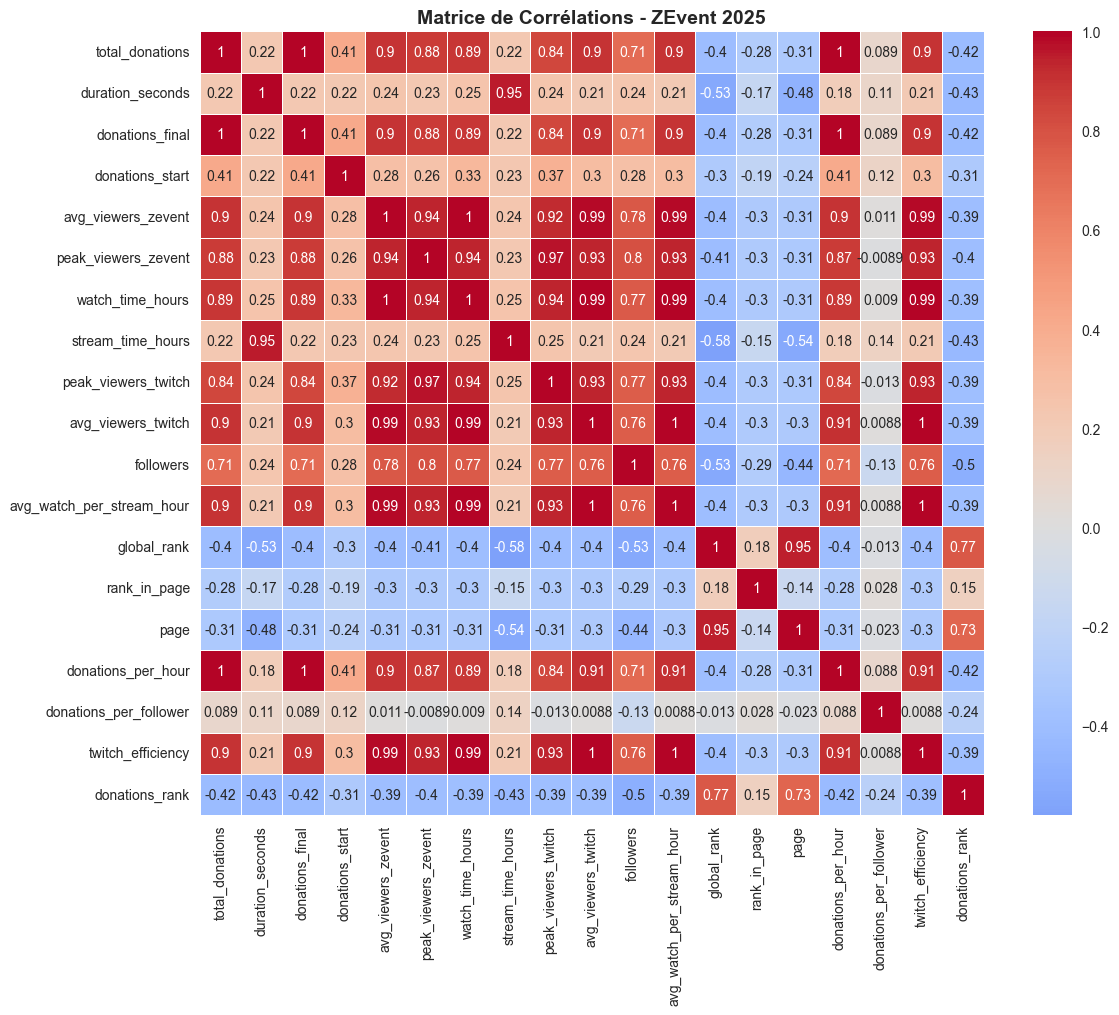

In [11]:
# Analyse des corrélations avec les données enrichies
if not df_enriched.empty and len(df_enriched.columns) > len(df_streamers.columns):
    print("🔍 ANALYSE DES CORRÉLATIONS")
    print("=" * 30)
    
    # Sélection des colonnes numériques
    numeric_cols = df_enriched.select_dtypes(include=[np.number]).columns
    
    if len(numeric_cols) > 1:
        # Matrice de corrélation
        corr_matrix = df_enriched[numeric_cols].corr()
        
        plt.figure(figsize=(12, 10))
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
                    square=True, linewidths=0.5)
        plt.title('Matrice de Corrélations - ZEvent 2025', fontsize=14, fontweight='bold')
        plt.tight_layout()
        plt.savefig(outputs_dir / 'correlations.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        # Top corrélations avec les dons
        if donation_cols and donation_cols[0] in corr_matrix.columns:
            donation_corr = corr_matrix[donation_cols[0]].abs().sort_values(ascending=False)
            print(f"\n🎯 CORRÉLATIONS AVEC LES DONS:")
            for col, corr in donation_corr.head(10).items():
                if col != donation_cols[0]:
                    print(f"   {col:<30} {corr:>6.3f}")
else:
    print("⚠️ Pas assez de données pour l'analyse des corrélations")

## 5. Analyse des Objectifs de Dons

In [12]:
# Analyse des goals
if not df_goals.empty:
    print("🎯 ANALYSE DES OBJECTIFS DE DONS")
    print("=" * 35)
    
    print(f"   Nombre total d'objectifs: {len(df_goals)}")
    
    # Colonnes disponibles
    print("\n📋 Colonnes disponibles:")
    for col in df_goals.columns:
        print(f"   - {col}")
    
    # Affichage des premières lignes
    print("\n📊 Aperçu des données:")
    print(df_goals.head())
else:
    print("⚠️ Pas de données d'objectifs disponibles")

🎯 ANALYSE DES OBJECTIFS DE DONS
   Nombre total d'objectifs: 5442

📋 Colonnes disponibles:
   - id
   - participation_id
   - name
   - category
   - amount
   - accomplished
   - links
   - streamer_id
   - streamer_name
   - streamer_login

📊 Aperçu des données:
                                     id                      participation_id  \
0  56dbd192-e0ec-437d-94ae-2fd9fa520a61  3f847d41-2642-48a4-8b04-f8fe65fc7c7d   
1  f0744c0d-f88f-4fa0-8e70-e70f0067fceb  3f847d41-2642-48a4-8b04-f8fe65fc7c7d   
2  1838b005-ea33-4900-baac-e1f4c2326fb2  3f847d41-2642-48a4-8b04-f8fe65fc7c7d   
3  56374439-88ec-4327-8df6-1da8b9b8d499  3f847d41-2642-48a4-8b04-f8fe65fc7c7d   
4  c6fc3b52-0652-4177-bb7f-c0123c8f0da4  3f847d41-2642-48a4-8b04-f8fe65fc7c7d   

                                            name category  amount  \
0                            No cut sans top 200   simple   100.0   
1  Deck aléatoire chaque défaite = 20€ (5 games)   simple   250.0   
2                       Participer à la C

## 6. Insights et Découvertes

In [13]:
# Génération d'insights automatiques
print("🔍 INSIGHTS ET DÉCOUVERTES")
print("=" * 25)

insights = []

if donation_cols:
    donation_col = donation_cols[0]
    
    # Distribution des dons
    median_donation = df_streamers[donation_col].median()
    mean_donation = df_streamers[donation_col].mean()
    top_10_pct = df_streamers[donation_col].quantile(0.9)
    
    insights.append(f"💰 La médiane des dons ({median_donation:,.0f}€) est {'inférieure' if median_donation < mean_donation else 'supérieure'} à la moyenne ({mean_donation:,.0f}€)")
    
    # Concentration
    top_10_streamers_contrib = df_streamers.nlargest(10, donation_col)[donation_col].sum() / df_streamers[donation_col].sum() * 100
    insights.append(f"🏆 Les 10 premiers streamers représentent {top_10_streamers_contrib:.1f}% du total des dons")
    
    # Écart avec le leader
    max_donation = df_streamers[donation_col].max()
    second_max = df_streamers[donation_col].nlargest(2).iloc[1]
    leader_gap = ((max_donation - second_max) / second_max) * 100
    insights.append(f"📊 Le leader a {leader_gap:.0f}% de dons en plus que le 2ème")

# Données enrichies insights
if not df_enriched.empty and 'Watch time(minutes)' in df_enriched.columns:
    watch_time_col = 'Watch time(minutes)'
    correlation_watch_donation = df_enriched[[donation_col, watch_time_col]].corr().iloc[0,1]
    insights.append(f"📺 Corrélation dons/temps de visionnage: {correlation_watch_donation:.3f}")

# Affichage des insights
for i, insight in enumerate(insights, 1):
    print(f"   {i}. {insight}")

print(f"\n✨ Analyse terminée ! {len(insights)} insights générés.")

🔍 INSIGHTS ET DÉCOUVERTES
   1. 💰 La médiane des dons (5,035€) est inférieure à la moyenne (40,543€)
   2. 🏆 Les 10 premiers streamers représentent 53.0% du total des dons
   3. 📊 Le leader a 21% de dons en plus que le 2ème

✨ Analyse terminée ! 3 insights générés.


## 7. Résumé Exécutif

In [14]:
# Génération d'un résumé exécutif
print("📋 RÉSUMÉ EXÉCUTIF - ZEVENT 2025")
print("=" * 40)

summary = {
    'Streamers participants': len(df_streamers),
    'Événements programmés': len(df_events) if not df_events.empty else 'N/A',
    'Objectifs de dons': len(df_goals) if not df_goals.empty else 'N/A'
}

if donation_cols:
    summary.update({
        'Total des dons (€)': f"{df_streamers[donation_col].sum():,.2f}",
        'Don médian (€)': f"{df_streamers[donation_col].median():,.2f}",
        'Top contributeur (€)': f"{df_streamers[donation_col].max():,.2f}"
    })

for key, value in summary.items():
    print(f"• {key:<25}: {value}")

print("\n📈 Fichiers générés:")
output_files = list(outputs_dir.glob('*.png'))
for file in output_files:
    print(f"   - {file.name}")

print("\n🎉 Analyse complète terminée !")

📋 RÉSUMÉ EXÉCUTIF - ZEVENT 2025
• Streamers participants   : 319
• Événements programmés    : 57
• Objectifs de dons        : 5442
• Total des dons (€)       : 12,933,157.44
• Don médian (€)           : 5,035.00
• Top contributeur (€)     : 1,479,669.67

📈 Fichiers générés:
   - analyse_dons.png
   - correlations.png

🎉 Analyse complète terminée !
